In [1]:
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd

workData = "https://raw.githubusercontent.com/Web-Cam/MachineLearningProject/master/Absenteeism_at_work.csv"
dataset = pd.read_csv(workData)

In [2]:
from sklearn import model_selection
array = dataset.values

X = np.c_[dataset["ID"]]
Y = np.c_[dataset["Month of absence"]]
test_size = 0.20


In [3]:
import matplotlib.pyplot as plt
dataset.plot(kind = 'hist',y= "Month of absence",histtype="bar",edgecolor='black', linewidth=1.2,bins=range(1,14))
plt.show()

<Figure size 640x480 with 1 Axes>

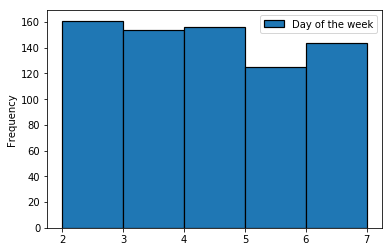

In [4]:
dataset.plot(kind = 'hist',y= "Day of the week",bins=range(2,8),edgecolor='black', linewidth=1.2)
plt.show()

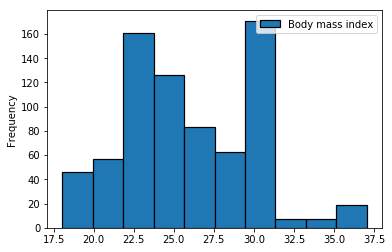

In [5]:
dataset.plot(kind = 'hist',y= "Body mass index",edgecolor='black', linewidth=1.2,align='left')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def TestTrain(x, y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print('Accuracy: {}'.format(round(knn.score(X_test, y_test), 3)))

In [7]:
    y = dataset['Social smoker']
    x = dataset.drop('Social smoker', axis=1)
    TestTrain(x,y)

Accuracy: 0.98


In [8]:
    y = dataset['Body mass index']
    x = dataset.drop('Body mass index', axis=1)
    TestTrain(x,y)

Accuracy: 0.872


In [9]:
    y = dataset['Total']
    x = dataset.drop('Total', axis=1)
    TestTrain(x,y)

Accuracy: 0.851


In [10]:
def collectData():
    ID = input("Enter Employee ID ")
    Distance = input("Enter Employee Distance From work ")
    Service = input("Enter Employee Service Time ")
    AGE = input("Employee Age")
    EDU = input("Enter Employee Education")
    Child = input("Enter Number of children")
    Pets = input("Enter Number of pets")
    BMI = input("Enter BMI")
    return(ID,Distance,Service,AGE,EDU,Child,Pets,BMI)
    

In [35]:
def KNNPredict(x, y,df):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)    
    return knn.predict(df2)

In [39]:
    collection = collectData()
    
    df2 = pd.DataFrame({"ID":[collection[0]],
                    "Age":[collection[3]],
                    "Distance from Residence to Work":[collection[1]],
                    "Service time":[collection[2]],
                    "Education":[collection[4]],
                        "Son":[collection[5]],
                        "pet":[collection[6]],
                        "Body mass index":[collection[7]]

                              
                              }) 
    
    y = dataset['Total']

    
    x = dataset.drop(['Total','Reason for absence','Day of the week','Seasons','Transportation expense','Hit target',
                     'Work load Average/day ','Social drinker','Social smoker','Weight','Height','Absenteeism time in hours','Month of absence',
                      'Disciplinary failure'
                     
                     ], axis=1)



    print("DAYS EXPECTED TO BE ABSENT:" ,KNNPredict(x,y, df2))

Enter Employee ID 37
Enter Employee Distance From work 10
Enter Employee Service Time 4
Employee Age34
Enter Employee Education1
Enter Number of children3
Enter Number of pets0
Enter BMI30
DAYS EXPECTED TO BE ABSENT: [76]
